# Visualiser code for vibration testing

## Data prep

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import time
import sys


path="/its/home/drs25/Documents/GitHub/TactileSensor/Code/Data collection/vibration/"
if sys.platform.startswith('win'):
    path="C:/Users/dexte/Documents/GitHub/TactileSensor/Code/Data collection/vibration/"
df = pd.read_csv(path+'vibration.csv')
print(df.keys())

merged_df=None
#merge all and average at each LED
for value in list(set(df['Rotation']))[:-1]:
    oneRotation=df.loc[df['Rotation'] == value]
    df2= oneRotation.groupby('LED_no').agg({'Rotation': 'first','s1': 'mean', 's2': 'mean', 's3': 'mean', 's4': 'mean'}).reset_index()
    print(max(df2['LED_no']))
    if type(merged_df)==type(None):
        merged_df=df2.copy()
    else:
        merged_df = pd.merge(merged_df, df2)

#merge all and average at each rotation

averaged_all = oneRotation.groupby('LED_no').agg({'s1': 'mean', 's2': 'mean', 's3': 'mean', 's4': 'mean'}).reset_index()

Index(['Rotation', 'LED_no', 's1', 's2', 's3', 's4', 't'], dtype='object')
59.0


In [16]:
print(averaged_all)

   LED_no           s1           s2           s3           s4
0     0.0  1770.880000  1855.040000  2033.600000  2006.400000
1     1.0  1764.800000  1854.080000  2032.320000  2006.080000
2     2.0  1773.120000  1861.120000  2037.120000  2005.760000
3     3.0  1767.680000  1849.280000  2040.000000  2007.680000
4     4.0  1771.520000  1857.920000  2038.080000  2003.520000
5     5.0  1770.880000  1849.920000  2039.040000  2004.480000
6     6.0  1765.760000  1852.800000  2032.640000  2004.160000
7     7.0  1771.428571  1851.885714  2036.114286  2010.514286


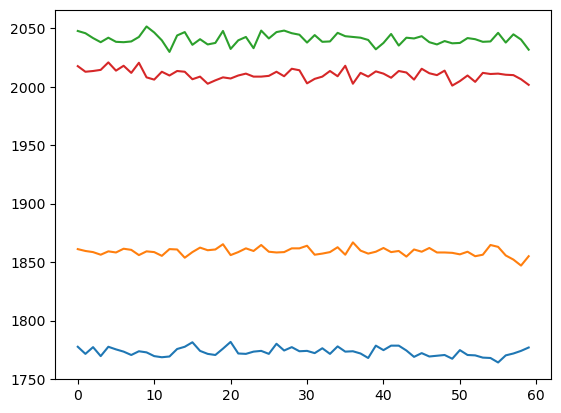

In [22]:
start=100
end=300
plt.plot(averaged_all['s1'])
plt.plot(averaged_all['s2'])
plt.plot(averaged_all['s3'])
plt.plot(averaged_all['s4'])
plt.show()

## circle plotter

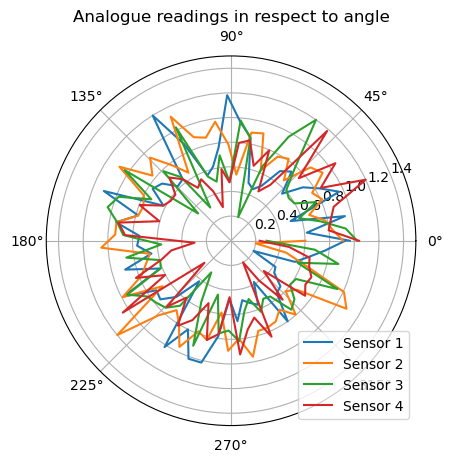

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def plotData(frame,keys=["s1","s2","s3","s4"]):
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    for key in keys:
        audio_data = merged_df[key]  # Example random audio data

        # Normalize audio data to be between 0 and 1
        normalized_audio = (audio_data - np.min(audio_data)) / (np.max(audio_data) - np.min(audio_data))

        # Create polar plot
        time = np.linspace(0, 2 * np.pi, len(normalized_audio))  # Time values for the circle
        radius = normalized_audio +0.2  # Amplitude values as radius 

        ax.plot(time, radius,label="Sensor "+str(key[1]))
    ax.set_rmax(1.5)  # Set the maximum radius to 1 (normalized values)
    plt.title("Analogue readings in respect to angle")
    plt.legend(loc="lower right")
    plt.show()

plotData(averaged_all)